<a href="https://colab.research.google.com/github/Jed-77/tensorflow-deeplearning/blob/master/TF2_0_Autoregressive_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Imports
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
import numpy as np
import matplotlib.pyplot as plt

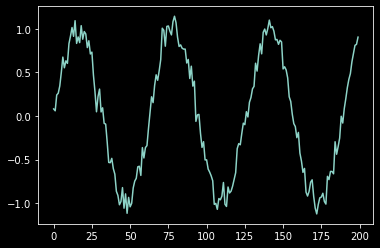

In [0]:
# Create a synthetic data series
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1
plt.plot(series)

In [0]:
# Build the data set
# T is the window size we are looking at. So essentially, we are looking at a 
# ... window of 10 values and trying to predict the next one. Hence, we create
# ... X which contains all windows and Y which contains the next value (target)
T = 10
X = []
Y = []
for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)
X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X) # the number of windows we have
print("X.Shape: ", X.shape, "Y.Shape: ", Y.shape)


X.Shape:  (190, 10) Y.Shape:  (190,)


In [0]:
# Try an autoregressive model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(loss='mse', optimizer=Adam(lr=0.1),)

# Train the RNN
r = model.fit(X[:-N//2], Y[:-N//2],
              epochs=80,
              validation_data=(X[N//2:], Y[-N//2:]))

Epoch 1/80
3/3 [==============================] - 0s 23ms/step - loss: 0.2955 - val_loss: 0.2420
Epoch 2/80
3/3 [==============================] - 0s 11ms/step - loss: 0.1632 - val_loss: 0.0392
Epoch 3/80
3/3 [==============================] - 0s 12ms/step - loss: 0.1073 - val_loss: 0.0797
Epoch 4/80
3/3 [==============================] - 0s 11ms/step - loss: 0.0564 - val_loss: 0.0441
Epoch 5/80
3/3 [==============================] - 0s 11ms/step - loss: 0.0734 - val_loss: 0.0595
Epoch 6/80
3/3 [==============================] - 0s 11ms/step - loss: 0.0481 - val_loss: 0.0400
Epoch 7/80
3/3 [==============================] - 0s 12ms/step - loss: 0.0575 - val_loss: 0.0472
Epoch 8/80
3/3 [==============================] - 0s 11ms/step - loss: 0.0359 - val_loss: 0.0326
Epoch 9/80
3/3 [==============================] - 0s 11ms/step - loss: 0.0447 - val_loss: 0.0281
Epoch 10/80
3/3 [==============================] - 0s 11ms/step - loss: 0.0261 - val_loss: 0.0256
Epoch 11/80
3/3 [============

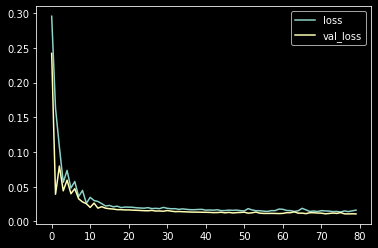

In [0]:
# Plot our loss per iteration.
from matplotlib import style
style.use('dark_background')
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [0]:
# Forecase future values

validation_target = Y[-N//2:]
validation_predictions = []

# last train input (last window of 10)
last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0,0] # make the prediction using the x
  validation_predictions.append(p) # update the prediction
  last_x = np.roll(last_x, -1)  # move the window
  last_x[-1] = p  # make the new input for the loop

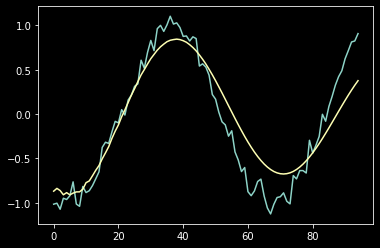

In [0]:
# plot the output
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecase prediction')
